In [51]:
import matplotlib.pyplot as plt

import numpy as np

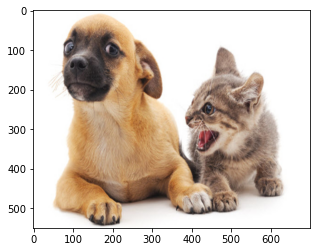

In [6]:
img = plt.imread('catdog.png')
plt.imshow(img)

In [40]:
def add_bbox(fig, bbox, color='black', label=None, text_color='white'):
    rect = plt.Rectangle(
        xy=(bbox[0], bbox[1]), 
        width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2
    )

    fig.axes.add_patch(rect)
    if label:
        fig.axes.text(
            rect.xy[0], rect.xy[1], label,
            va='center', ha='center', fontsize=9, color=text_color,
            bbox=dict(facecolor=color, lw=0)
        )

In [42]:
['r', 'g', 'b'] * 3

['r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b']

In [163]:
def show_bboxes(fig, bboxes, colors=None, labels=None):
    if not labels:
        labels = [None] * len(bboxes)
    if not colors:
        colors =  ['b', 'g', 'r', 'm', 'c'] * len(bboxes)
    
    for bbox, color, label in zip(bboxes, colors, labels):
        add_bbox(fig, bbox, color, label)
    
    plt.show()

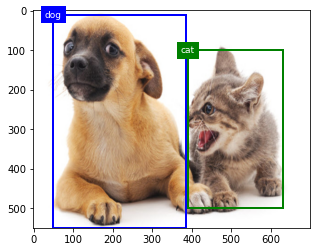

In [164]:
dog_bbox, cat_bbox = [50, 10, 385, 550], [390, 100, 630, 500]

fig = plt.imshow(img)

show_bboxes(fig, [dog_bbox, cat_bbox], labels=['dog', 'cat'])

In [166]:
def angle_box(pixel, height, width, sizes, ratios):
    bboxes = []
    for size in sizes:
        for ratio in ratios:
            h = (height / 2) * size
            w = (width / 2) * size
            bboxes.append([pixel[0] + h * ratio, pixel[1] - w, pixel[0] - h * ratio, pixel[1] + w])
            bboxes.append([pixel[0] + h, pixel[1] - w * ratio, pixel[0] - h, pixel[1] + w * ratio])
    
    return [*filter(lambda x: not (x[0] > height or x[1] > width), bboxes)]

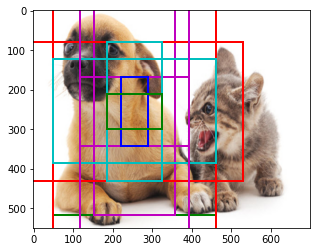

In [167]:
fig = plt.imshow(img)
bs = bbox_prior([255, 255], h, w, sizes=[0.75, 0.5, 0.25], ratios=[1, 2, 0.5])
show_bboxes(fig, bs)